In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key
import random
import timeit
import numpy as np

# Use the citipy module to determine city 
# based on latitude and longitude.
from citipy import citipy

In [ ]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12.6 µs ± 61.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.66 ms ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bluff nz
pueblo us
port elizabeth za
sitka us
tautira pf
port alfred za
busselton au
brainerd us
mataura pf
ushuaia ar
castro cl
palu id
uruacu br
kaitangata nz
hobart au
mataura pf
airai pw
fortuna us
hovd mn
taolanaro mg
kruisfontein za
illoqqortoormiut gl
kapaa us
albany au
zabid ye
kibakwe tz
jamestown sh
bethel us
tarnogskiy gorodok ru
bengkulu id
sao filipe cv
kaputa zm
rikitea pf
hithadhoo mv
butaritari ki
goure ne
longlac ca
lebu cl
rikitea pf
rikitea pf
dharchula in
custoias pt
hermanus za
kavieng pg
karamea nz
ilulissat gl
qaanaaq gl
illoqqortoormiut gl
vila do maio cv
busselton au
khatanga ru
sentyabrskiy ru
jamestown sh
tidore id
bobon ph
alta gracia ar
bredasdorp za
rikitea pf
taolanaro mg
nusaybin tr
warqla dz
rikitea pf
dicabisagan ph
roseland us
khatanga ru
trairi br
hobart au
carmen mx
chokurdakh ru
yellowknife ca
port alfred za
north bend us
lebu cl
new norfolk au
new norfolk au
kapaa us
airai pw
sao raimundo nonato br
dali cn
barentsburg sj
dikson ru
scarborough tt
u

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


In [ ]:
city_url = url + "&q=" + "Toronto"


In [ ]:
weather_response = requests.get(city_url)
boston_data = weather_response.json()
if weather_response.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [ ]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

43.7001 -79.4163 25.27 83 95 0.45


In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 8, 9, 1, 6, 53)

======================================================

In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | pueblo
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | tautira
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | brainerd
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | palu
Processing Record 13 of Set 1 | uruacu
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | albany
Processing Record 2

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,5.45,73,99,7.49,NZ,2021-08-09 01:10:36
1,Pueblo,38.2545,-104.6091,33.42,24,1,4.63,US,2021-08-09 01:09:49
2,Port Elizabeth,-33.9180,25.5701,10.05,84,90,4.50,ZA,2021-08-09 01:10:36
3,Sitka,57.0531,-135.3300,15.94,72,90,5.66,US,2021-08-09 01:10:37
4,Tautira,-17.7333,-149.1500,29.01,75,61,4.25,PF,2021-08-09 01:10:37
5,Port Alfred,-33.5906,26.8910,14.89,84,92,6.08,ZA,2021-08-09 01:10:37
6,Busselton,-33.6500,115.3333,13.36,58,97,10.30,AU,2021-08-09 01:10:37
7,Brainerd,46.3580,-94.2008,25.16,69,20,2.57,US,2021-08-09 01:10:38
8,Mataura,-46.1927,168.8643,5.27,98,100,2.35,NZ,2021-08-09 01:10:38
9,Ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,2021-08-09 01:10:38


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628471593.3449125

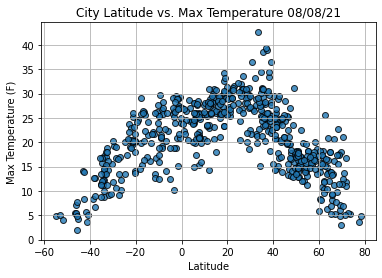

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

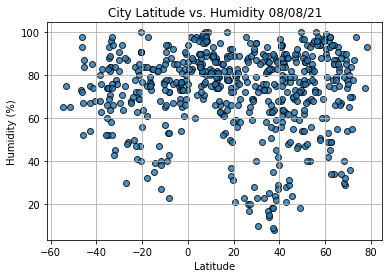

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

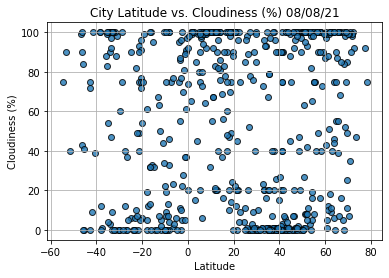

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

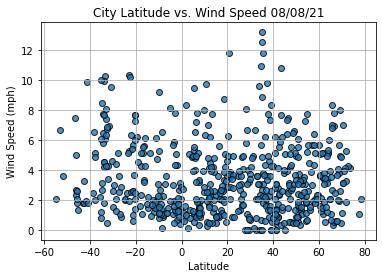

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [30]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [31]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

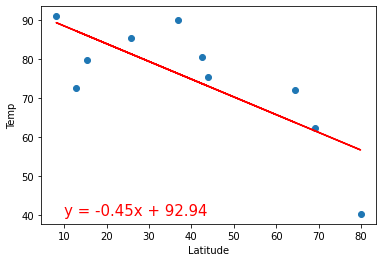

In [32]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

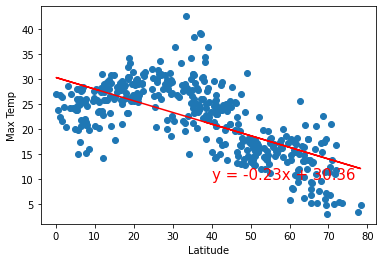

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(40,10))

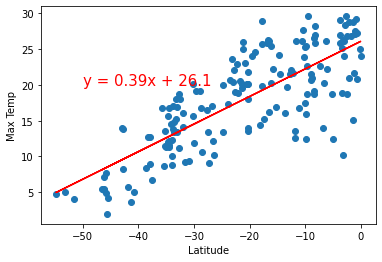

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,20))

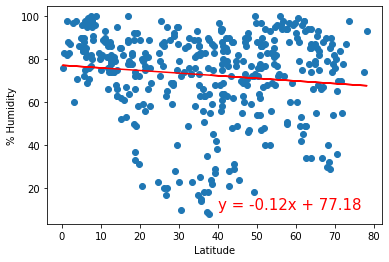

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

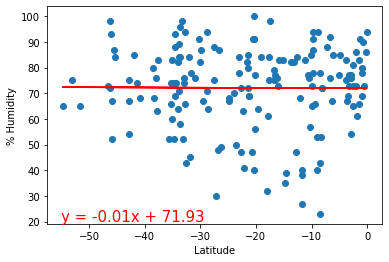

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

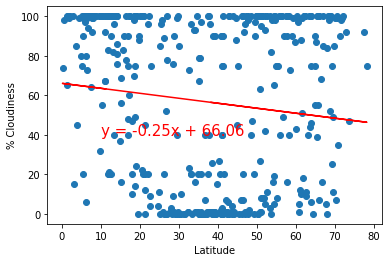

In [67]:
northern_hemi_df
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nothern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))


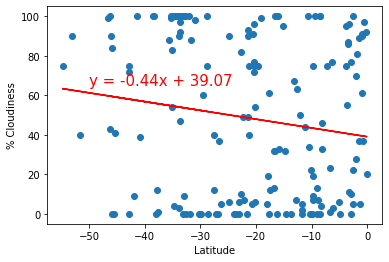

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65))

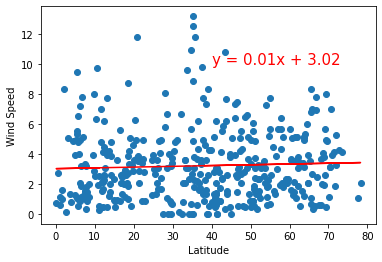

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

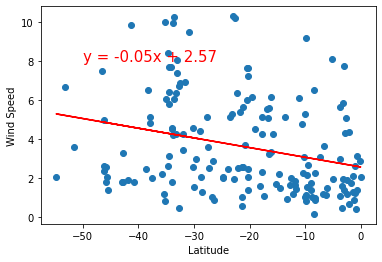

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,8))